Prova Final:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

Resumo de como montar teste de hipoteses pra casos:
- Teste Z: Normal
- Teste T: variancia x desconhecido
- Bootstrapping : nada conhecido
- Regressao simples, multipla e OLS

TH em Teste Z-> Definir se e uni ou bi caudal:

In [4]:
#exemplo:
X = [91.6, 88.75, 90.8, 89.95, 91.3]
μx = 90 #hipotese, acerca de ser rejeitado ou nao
σx = 3 #desvpad amostral
n = len(X)#len(X)se for uma lista
xb = np.mean(X) #np.mean(X) se for uma lista
σxb = σx/n**(0.5)#desvpad da media
α = 0.05

Fazendo pdf para interpretar:

valor-p = 0.7205147871362609

xcrit1 = 87.37043237827025
xcrit2 = 92.62956762172975


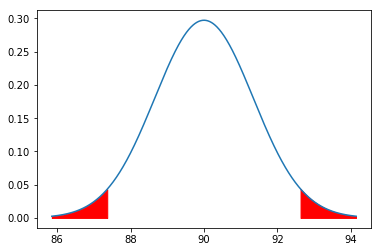

In [5]:
valor_p = (1-stats.norm.cdf(xb, loc=μx, scale=σxb))*2 # vezes 2 se for bicaudal, area de rejeição H0
print("valor-p = {0}\n".format(valor_p))

xcrit1 = stats.norm.ppf(α/2, loc=μx, scale=σxb)#esquerda
xcrit2 = stats.norm.ppf(1-α/2, loc=μx, scale=σxb)#direita

#pdf de Xb
x = np.arange(stats.norm.ppf(0.001, loc=μx, scale=σxb), stats.norm.ppf(0.999, loc=μx, scale=σxb), 0.01)
plt.plot(x, stats.norm.pdf(x, loc=μx, scale=σxb));

#RC1 - à esquerda
x = np.arange(stats.norm.ppf(0.001, loc=μx, scale=σxb), xcrit1, 0.01)
plt.fill_between(x, stats.norm.pdf(x, loc=μx, scale=σxb), color='red');
#RC2 - à direita
x = np.arange(xcrit2, stats.norm.ppf(0.999, loc=μx, scale=σxb), 0.01)
plt.fill_between(x, stats.norm.pdf(x, loc=μx, scale=σxb), color='red');

print("xcrit1 = {0}".format(xcrit1))
print("xcrit2 = {0}".format(xcrit2))

Para unicaudal:direita ou esquerda

In [10]:
X = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]

μx = 540
σx = 20
n = len(X)
xb = np.mean(X)
α = 0.05

σxb = σx/n**(0.5)

In [8]:
xcrit1 = stats.norm.ppf(1-α, loc=μx, scale=σxb)# direita
xcrit2 = stats.norm.ppf(α, loc=μx, scale=σxb)#esquerda
print("xcrit = {0}".format(xcrit1))

xcrit = 548.4939876055092


Valor p (apenas uma area):

In [9]:
valor_p = (1-stats.norm.cdf(xb, loc=μx, scale=σxb))
print("valor-p = {0}".format(valor_p))

valor-p = 0.014092901073953445


TH em Teste T-Student (desvpad desconhecido):Unicaudal, Bicaudal

Estimando S:

In [ ]:
s = np.std(lista, ddof=1) #estimado

Estimando T:

In [ ]:
t0 = (x_ - μ0)/(s/sqrt(n)) # montando a distribuição

Unicaudal : Tcrit esquerdo e Tcrit direito 

In [ ]:
#t critico 1 e 2 para unicaudal
α = 0.05
t2=stats.t.ppf(0.95,  df=14)#unicaudal para direita
stats.t.ppf(0.05,  df=14)#unicaudal para esquerda

Tobservado:

In [ ]:
#t obs:
1 - stats.t.cdf(t0, df=14)# t0 como T e df=n-1
#valor p 
1 - stats.t.cdf(xb, loc=μ0, scale=s/sqrt(n), df=14)

Teste para bicauldal : Tcrit esquerdo e direito

In [ ]:
# Teste T para bicaudal:
p_value = 2*stats.t.cdf(x_, loc=μ0, scale=s/sqrt(n), df=n-1)#multiplica por 2
# tcrit1:
regiao_esquerda = stats.t.ppf(α/2, loc=μ0, scale=s/sqrt(n), df=n-1)
#tcrit2:
regiao_direita = stats.t.ppf(1.0 - α/2, loc=μ0, scale=s/sqrt(n), df=n-1)

Feito isso, provar que T se aproxima de uma normal : qqplot

In [ ]:
stats.probplot(dados, dist='norm', plot=plt)

Bootstrap: nem média nem desvpad conhecidos

(array([  2.10000000e+01,   8.40000000e+01,   3.61000000e+02,
          8.85000000e+02,   1.89400000e+03,   3.25800000e+03,
          5.21200000e+03,   6.93900000e+03,   8.81700000e+03,
          1.00720000e+04,   1.06080000e+04,   1.05690000e+04,
          9.40200000e+03,   8.52300000e+03,   6.90400000e+03,
          5.42500000e+03,   3.89400000e+03,   2.74700000e+03,
          1.71700000e+03,   1.12000000e+03,   7.03000000e+02,
          4.10000000e+02,   2.09000000e+02,   1.06000000e+02,
          6.70000000e+01,   3.10000000e+01,   1.30000000e+01,
          7.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
 array([  99.05      ,  105.89048148,  112.73096296,  119.57144444,
         126.41192593,  133.25240741,  140.09288889,  146.93337037,
         153.77385185,  160.61433333,  167.45481481,  174.2952963 ,
         181.13577778,  187.97625926,  194.81674074,  201.65722222,
         208.4977037 ,  215.33818519,  222.17866667,  229.01914815,
         235.85962963,  242.70011111, 

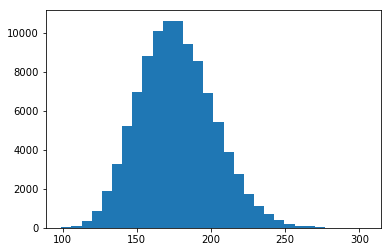

In [14]:
amostra = np.array([ 129.26,  204.49,  116.89,  106.4 ,   95.3 ,  123.35,   92.3 ,
        300.02,  264.34,  168.27,   80.02,  117.96,  117.73,  370.47,
        462.59,   92.58,  258.52,   82.59])
n = len(amostra)
count = 100000
dist_amostras = np.random.choice(amostra, replace=True, size=(n, count))
medias = np.mean(dist_amostras, axis = 0)                          
plt.hist(medias, bins=30)

Limite inferior e superior: depende do alpha

In [ ]:
np.percentile(medias, 2.5)
np.percentile(medias, 97.5)

Estimando Desv Pad : S

(array([   11.,    32.,    44.,   112.,    80.,   275.,   446.,   755.,
         1100.,  1806.,  2551.,  3487.,  4318.,  5096.,  5907.,  7470.,
         8914.,  9572.,  9595.,  8473.,  8666.,  7372.,  5334.,  3885.,
         2479.,  1285.,   629.,   221.,    68.,    17.]),
 array([  12.65076541,   17.7791064 ,   22.90744739,   28.03578838,
          33.16412937,   38.29247036,   43.42081135,   48.54915234,
          53.67749333,   58.80583432,   63.93417531,   69.0625163 ,
          74.19085729,   79.31919828,   84.44753927,   89.57588026,
          94.70422125,   99.83256224,  104.96090323,  110.08924422,
         115.21758521,  120.3459262 ,  125.47426719,  130.60260818,
         135.73094917,  140.85929016,  145.98763115,  151.11597214,
         156.24431313,  161.37265412,  166.50099511]),
 <a list of 30 Patch objects>)

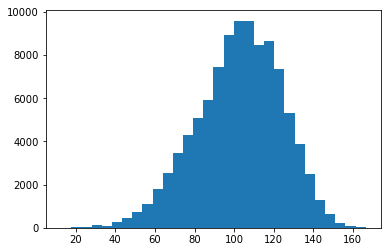

In [15]:
dist_amostras_sd = np.random.choice(amostra, replace=True, size=(n, count))
medias_sd = np.std(dist_amostras_sd, axis = 0)                          
plt.hist(medias_sd, bins=30)

Limite inferior e superior

In [ ]:
np.percentile(medias_sd, 2.5)
np.percentile(medias_sd, 97.5)

Regressão Linear: 

In [ ]:
import statsmodels.api as sm

Y = houses['Y']
X = houses['X']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

Mapeando os resultados da regressão nos betas temos:

β0=const

β1=sqft_lot

β2=sqft_basement



In [ ]:
beta_0 = results.params["const"]
beta_1 = results.params["X"]

Histograma dos ruidos :

In [ ]:
#Hist dos residuos fitado

e = df['Y'] - (b0 + b1*df['X'])
pd.Series(e).hist(normed=True);

(loc, scale) = stats.norm.fit(e)
x = np.arange(e.min(), e.max(), 0.01)
plt.plot(x, stats.norm.pdf(x, loc=loc, scale=scale));